In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))


In [7]:
class LogisticRegression():
    def __init__(self, X, y ):
        self.X = X
        y = y[:,np.newaxis]
        self.y = y 
    def fit(self, learning_rate = 0.03):
        m = len(self.y)
        y = self.y
        X = np.hstack((np.ones((m,1)),self.X))
        n = np.size(X,1)
        params = np.zeros((n,1))

        iterations = 1500
        

        initial_cost = compute_cost(X, y, params)
        (cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)
        self.params = params_optimal 
        self.cost_history = cost_history
        
    def _costFunc(self , X , y , theta):
        m = len(y)
        h = self.sigmoid(X @ theta)
        
        epsilon = 1e-5
        loss = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
        return loss
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, X):
        m = len(self.y)
        X = np.hstack((np.ones((m,1)),X))
        
        return np.round(sigmoid(X @ self.params))

In [9]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

logreg = LogisticRegression(X, y)
logreg.fit()
logreg.predict(X)

/home/mamitiana/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


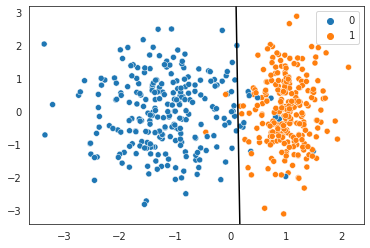

/home/mamitiana/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


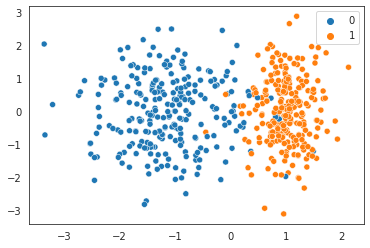

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



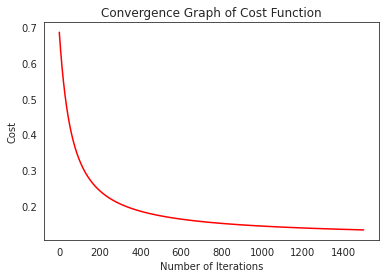

In [6]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [7]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.966
